## Task1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Настройки для красивых графиков
sns.set(style="whitegrid")

In [ ]:
url = "https://drive.google.com/uc?id=1vv2jGNp6EO8HHRoscDRQU90faR3j8iTN"
df = pd.read_csv(url)
features = ['MPG.city', 'MPG.highway', 'Horsepower', 'Price']
df = df[features].dropna()
df.head()

,MPG.city,MPG.highway,Horsepower,Price
0,25,31,140,15.9
1,18,25,200,33.9
2,20,26,172,29.1
3,19,26,172,37.7
4,22,30,208,30.0


##Корреляционная матрица и диаграммы рассеяния

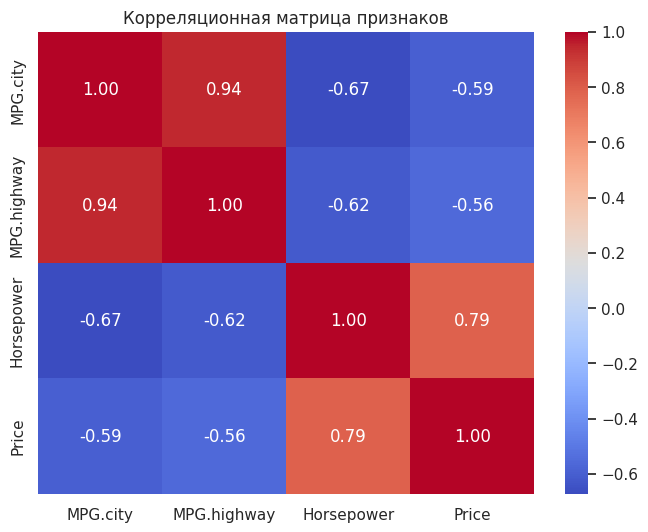

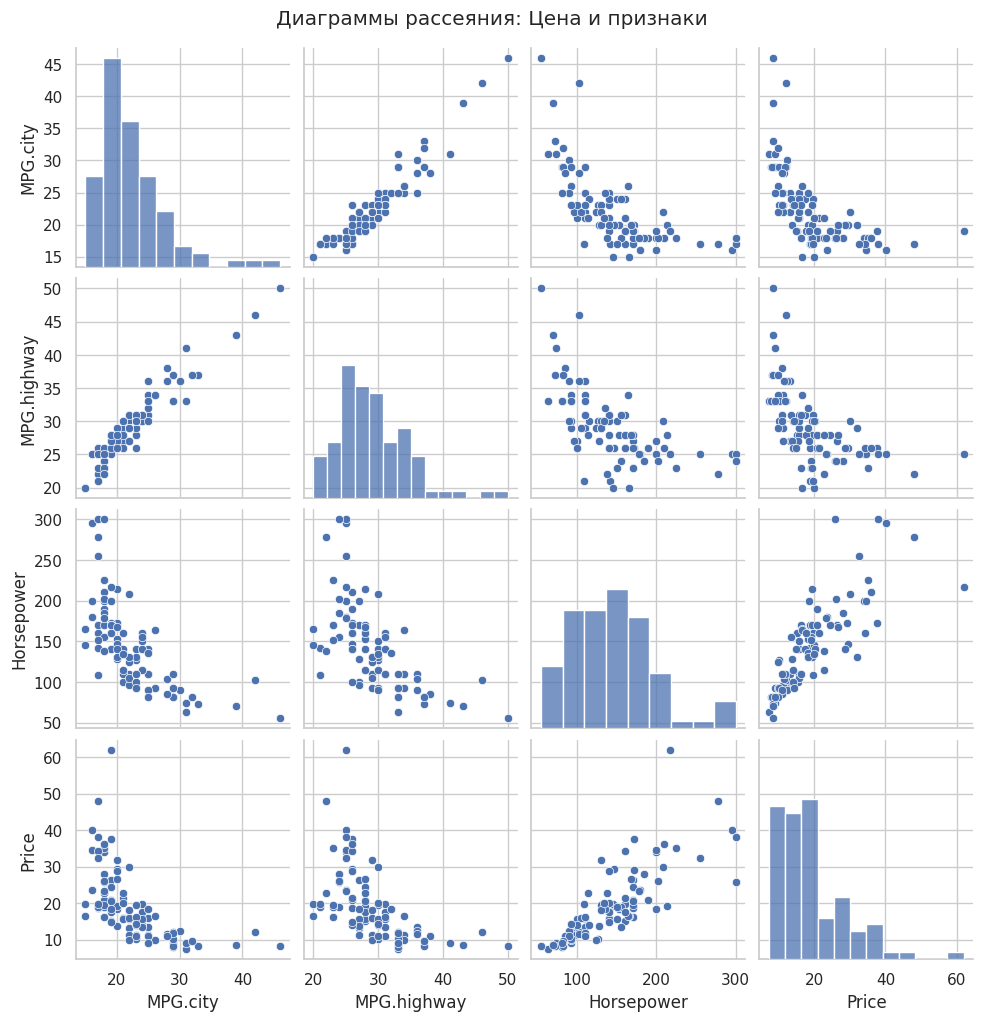

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица признаков')
plt.show()

# Диаграммы рассеяния
sns.pairplot(df)
plt.suptitle('Диаграммы рассеяния: Цена и признаки', y=1.02)
plt.show()

**Пояснение:** Корреляционная матрица показывает линейные зависимости между признаками. Диаграммы рассеяния позволяют визуально оценить характер зависимости между переменными.

## Построение матрицы признаков и оценка коэффициентов модели (МНК)

In [ ]:
X = df[['MPG.city', 'MPG.highway', 'Horsepower']].values
y = df['Price'].values.reshape(-1, 1)

# Добавляем столбец единиц для свободного члена (интерсепт)
X_b = np.hstack([np.ones((X.shape[0], 1)), X])

# Формула МНК: (X^T X)^-1 X^T y
beta_hat = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Выводим значения коэффициентов
columns = ['Intercept', 'MPG.city', 'MPG.highway', 'Horsepower']
for name, value in zip(columns, beta_hat.flatten()):
    print(f"{name}: {value:.4f}")

Intercept: 6.6887
MPG.city: -0.0386
MPG.highway: -0.1789
Horsepower: 0.1313


## Остатки и дисперсия ошибок

In [ ]:
y_hat = X_b @ beta_hat
residuals = y - y_hat
n, p = X_b.shape
sigma2 = (residuals.T @ residuals) / (n - p)
print(f"Оценка остаточной дисперсии: {sigma2.item():.4f}")

Оценка остаточной дисперсии: 35.6947


## Визуализация остатков

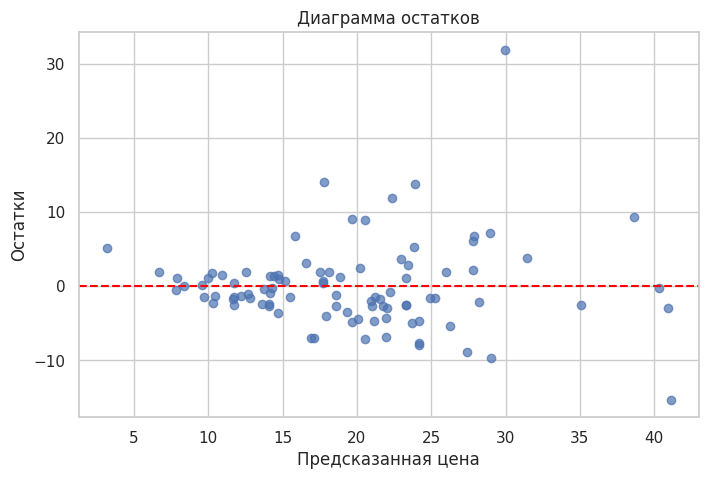

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_hat, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанная цена')
plt.ylabel('Остатки')
plt.title('Диаграмма остатков')
plt.show()

## Стандартные ошибки и доверительные интервалы для коэффициентов

In [ ]:
var_beta = sigma2.item() * np.linalg.inv(X_b.T @ X_b)
se_beta = np.sqrt(np.diag(var_beta))
t_crit = stats.t.ppf(0.975, df=n - p)

for name, b, se in zip(columns, beta_hat.flatten(), se_beta):
    lower = b - t_crit * se
    upper = b + t_crit * se
    print(f"{name}: ({lower:.4f}, {upper:.4f})")

Intercept: (-5.2102, 18.5876)
MPG.city: (-0.7481, 0.6709)
MPG.highway: (-0.8835, 0.5258)
Horsepower: (0.0993, 0.1633)


## Коэффициент детерминации R²



In [ ]:
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_res = np.sum(residuals ** 2)
r2 = 1 - ss_res / ss_total
print(f"Коэффициент детерминации R²: {r2:.4f}")

Коэффициент детерминации R²: 0.6299


## Сравнение истинных и предсказанных значений

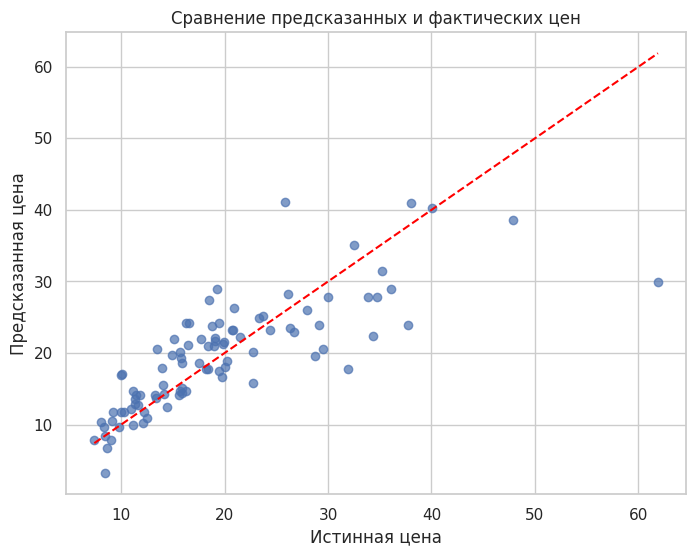

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y_hat, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Истинная цена')
plt.ylabel('Предсказанная цена')
plt.title('Сравнение предсказанных и фактических цен')
plt.show()

## Проверка гипотез

### Гипотеза 1: Мощность влияет на цену (Horsepower > 0)

In [ ]:
t_stat_hp = beta_hat[3] / se_beta[3]
p_value_hp = 1 - stats.t.cdf(t_stat_hp, df=n - p)
print(f"Статистика t = {t_stat_hp.item():.4f}, p-value = {p_value_hp.item():.4f}")

NameError: name 'beta_hat' is not defined

### Гипотеза 2: Цена зависит от расхода в городе (MPG.city ≠ 0)

In [ ]:
t_stat_city = beta_hat[1] / se_beta[1]
p_value_city = 2 * (1 - stats.t.cdf(np.abs(t_stat_city), df=n - p))
print(f"Статистика t = {t_stat_city.item():.4f}, p-value = {p_value_city.item():.4f}")

Статистика t = -0.1081, p-value = 0.9142


### Гипотеза 3: Влияние MPG.city и MPG.highway одинаково

In [ ]:
diff = beta_hat[1] - beta_hat[2]
se_diff = np.sqrt(var_beta[1,1] + var_beta[2,2] - 2*var_beta[1,2])
t_stat_diff = diff / se_diff
p_value_diff = 2 * (1 - stats.t.cdf(np.abs(t_stat_diff), df=n - p))
print(f"Статистика t = {t_stat_diff.item():.4f}, p-value = {p_value_diff.item():.4f}")

Статистика t = 0.2018, p-value = 0.8406


## Результаты проверки гипотез

### Гипотеза 1: Мощность влияет на цену автомобиля

**Формулировка гипотез:**
- H₀: β<sub>horsepower</sub> = 0 — мощность не влияет на цену
- H₁: β<sub>horsepower</sub> > 0 — мощность положительно влияет на цену

**Результаты:**
- t-статистика: 8.1530  
- p-value: 0.0000  

**Вывод:**  
Так как p-value < 0.05, мы отвергаем нулевую гипотезу.  
**Мощность двигателя статистически значимо влияет на цену автомобиля: более мощные автомобили, как правило, дороже.**

---

### Гипотеза 2: Расход в городе влияет на цену

**Формулировка гипотез:**
- H₀: β<sub>city</sub> = 0 — расход в городе не влияет на цену

**Результаты:**
- t-статистика: –0.1081  
- p-value: 0.9142  

**Вывод:**  
Так как p-value значительно больше уровня значимости 0.05, нет оснований отвергать нулевую гипотезу.  
**Расход в городе не оказывает статистически значимого влияния на цену автомобиля.**

---

### Гипотеза 3: Расход в городе и на шоссе влияют на цену одинаково

**Формулировка гипотез:**
- H₀: β<sub>city</sub> = β<sub>highway</sub> — влияние городского и шоссейного расхода на цену одинаково

**Результаты:**
- t-статистика: 0.2018  
- p-value: 0.8406  

**Вывод:**  
p-value значительно превышает уровень значимости 0.05.  
**Нет достаточных доказательств того, что влияние расхода в городе и на шоссе на цену различается. Следовательно, гипотеза о равенстве коэффициентов не отвергается.**

## Task2


In [ ]:
# Импорты
import pandas as pd
import numpy as np
from scipy.stats import f

# Загрузка данных
url = "https://drive.google.com/uc?id=1gzPRqj7gZetjsipo3xpogYGL76enZDNO "
data = pd.read_csv(url)

# Просмотр первых строк
data.head()

,sex,bmi,smoker
0,female,27.900,yes
1,male,33.770,no
2,male,33.000,no
3,male,22.705,no
4,male,28.880,no


- **`bmi_yes`** — выборка BMI у курящих  
- **`bmi_no`**  — выборка BMI у некурящих  
- **`n_yes`**, **`n_no`** — размеры выборок  
- **`x̄_yes`**, **`x̄_no`**, **`x̄_total`** — средние значения:
  - `x̄_yes` — среднее BMI курящих,  
  - `x̄_no` — среднее BMI некурящих,  
  - `x̄_total` — общее среднее BMI.  

In [ ]:
# Разделение на группы
bmi_yes = data[data['smoker'] == 'yes']['bmi']
bmi_no = data[data['smoker'] == 'no']['bmi']

# Размеры выборок
n_yes, n_no = len(bmi_yes), len(bmi_no)
total_n = n_yes + n_no

# Средние
mean_yes, mean_no = bmi_yes.mean(), bmi_no.mean()
total_mean = data['bmi'].mean()

print(f"Среднее BMI у курящих: {mean_yes:.3f}")
print(f"Среднее BMI у некурящих: {mean_no:.3f}")
print(f"Общее среднее: {total_mean:.3f}")

Среднее BMI у курящих: 30.708
Среднее BMI у некурящих: 30.652
Общее среднее: 30.663


### 🧮 Формулы:

1. **Общая сумма квадратов (SST):**  
   $$
   SST = \sum_{i} (x_i - \bar{x}_{total})^2
   $$  

2. **Межгрупповая сумма квадратов (SSB):**  
   $$
   SSB = \sum_{j} n_j (\bar{x}_j - \bar{x}_{total})^2
   $$  
   где:  
   - $j$ — индекс группы (например, `yes`/`no`),  
   - $n_j$ — размер группы $j$.  

3. **Внутригрупповая сумма квадратов (SSW):**  
   $$
   SSW = \sum_{j} \sum_{i} (x_{ij} - \bar{x}_j)^2
   $$  
   где:  
   - $x_{ij}$ — $i$-е наблюдение в группе j,  
   - $\bar{x}_j\$ — среднее группы j.  


In [ ]:
# Межгрупповая сумма квадратов (SSB)
ssb = n_yes * (mean_yes - total_mean)**2 + n_no * (mean_no - total_mean)**2

# Внутригрупповая сумма квадратов (SSW)
ssw_yes = ((bmi_yes - mean_yes)**2).sum()
ssw_no = ((bmi_no - mean_no)**2).sum()
ssw = ssw_yes + ssw_no

# Общая сумма квадратов (SST)
sst = ssb + ssw

# Степени свободы
df_between = 2 - 1  # k - 1
df_within = total_n - 2  # N - k
df_total = total_n - 1

# Дисперсии (MSB и MSW)
msb = ssb / df_between
msw = ssw / df_within

# F-статистика
f_stat = msb / msw

# p-value
p_value = 1 - f.cdf(f_stat, df_between, df_within)

print(f"\nSSB: {ssb:.3f}, SSW: {ssw:.3f}, SST: {sst:.3f}")
print(f"MSB: {msb:.3f}, MSW: {msw:.3f}")
print(f"F-статистика: {f_stat:.3f}")
print(f"p-value: {p_value:.5f}")


SSB: 0.699, SSW: 49719.501, SST: 49720.200
MSB: 0.699, MSW: 37.215
F-статистика: 0.019
p-value: 0.89099


In [ ]:
anova_table = pd.DataFrame({
    'Source': ['Between Groups', 'Within Groups', 'Total'],
    'Sum of Squares': [ssb, ssw, sst],
    'Degrees of Freedom': [df_between, df_within, df_total],
    'Mean Square': [msb, msw, np.nan],
    'F': [f_stat, np.nan, np.nan],
    'p-value': [p_value, np.nan, np.nan]
})
print("\nТаблица ANOVA:")
display(anova_table)


Таблица ANOVA:


,Source,Sum of Squares,Degrees of Freedom,Mean Square,F,p-value
0,Between Groups,0.699349,1,0.699349,0.018792,0.890985
1,Within Groups,49719.501037,1336,37.215195,NaN,NaN
2,Total,49720.200386,1337,NaN,NaN,NaN


In [ ]:
alpha = 0.05
if p_value < alpha:
    print("✅ Гипотеза H₀ отвергается: средние значения BMI статистически различаются.")
else:
    print("❌ Нет оснований отвергать H₀: средние значения BMI не различаются.")

❌ Нет оснований отвергать H₀: средние значения BMI не различаются.
